# Dataset Breast Cancer

## Decision Tree Classifier

Berikut ini merupakan implementasi algoritma Decision Tree CLassifier menggunakan library scikit-learn.

### Setup Library dan Dataset

In [95]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
456,11.63,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,0.1799,0.06166,...,13.12,38.81,86.04,527.8,0.1406,0.20310,0.29230,0.06835,0.2884,0.07220
137,11.43,15.39,73.06,399.8,0.09639,0.06889,0.035030,0.028750,0.1734,0.05865,...,12.32,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.010120,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
223,15.75,20.25,102.60,761.3,0.10250,0.12040,0.114700,0.064620,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.1552,0.44800,0.39760,0.14790,0.3993,0.10640
522,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613


### Preprocessing and Pipelining

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Create model

In [97]:
from sklearn import tree
import sklearn.linear_model as lm
# Define model
modelDTL = tree.DecisionTreeClassifier(random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelDTL)
                     ])

### Fitting and predict

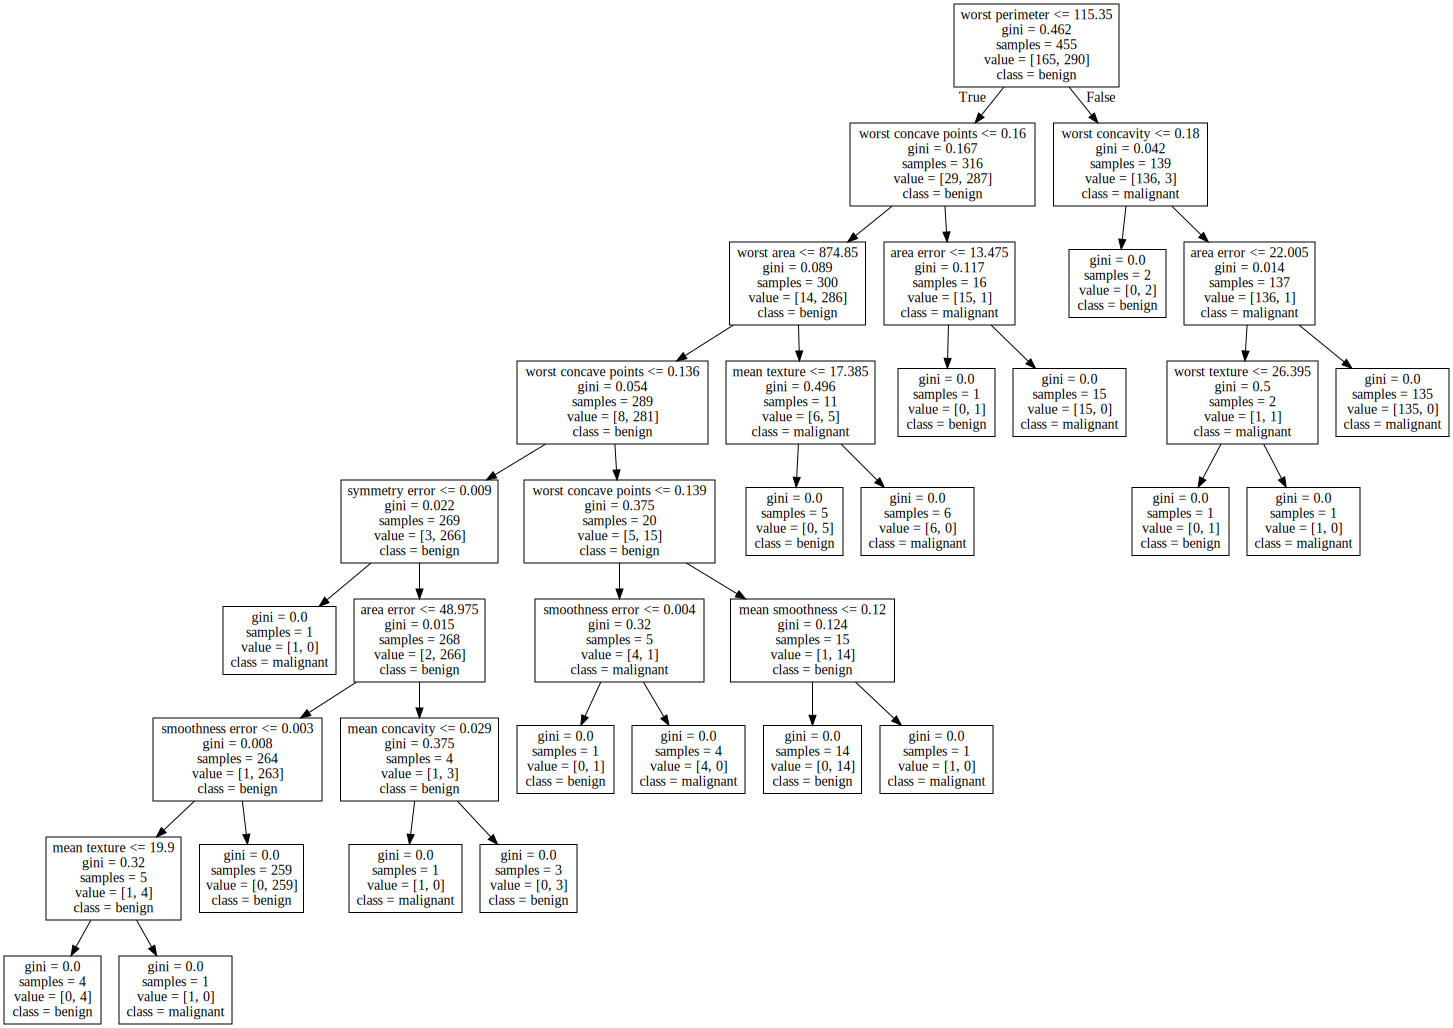

In [98]:
import graphviz
# Preprocessing of training data, fit model 
clf.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_dataDTL = tree.export_graphviz(modelDTL, 
                  feature_names=[d for d in data.feature_names],  
                  class_names= [d for d in data.target_names])
graphDTL = graphviz.Source(dot_dataDTL)

# Preprocessing of validation data, get predictions
predsDTL = clf.predict(X_valid_full)

graphDTL

### Accuracy and F1 Score

In [99]:
from sklearn.metrics import accuracy_score, f1_score

accuracyDTL = accuracy_score(y_valid, predsDTL)
f1DTL = f1_score(y_valid, predsDTL)
score_dataDTL = {'accuracy': accuracyDTL, 'f1': f1}
scoreDTL = pd.DataFrame(data = score_dataDTL, index=['score'])
scoreDTL

,accuracy,f1
score,0.903509,0.933333


## ID3 Estimator
Berikut ini merupakan implementasi algoritma ID3 Estimator menggunakan library yang berasal dari github.

### Setup Library dan Dataset

In [100]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
14,13.730,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,15.030,32.01,108.80,697.7,0.1651,0.7725,0.69430,0.22080,0.3596,0.14310
355,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,0.06184,...,13.370,22.43,89.02,547.4,0.1096,0.2002,0.23880,0.09265,0.2121,0.07188
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.550,25.09,126.90,1031.0,0.1365,0.4706,0.50260,0.17320,0.2770,0.10630
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,0.1870,0.07285,...,9.077,30.92,57.17,248.0,0.1256,0.0834,0.00000,0.00000,0.3058,0.09938
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.060,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842


### Create Model

In [101]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

# Define model
modelID3 = Id3Estimator()

### Fitting and predict

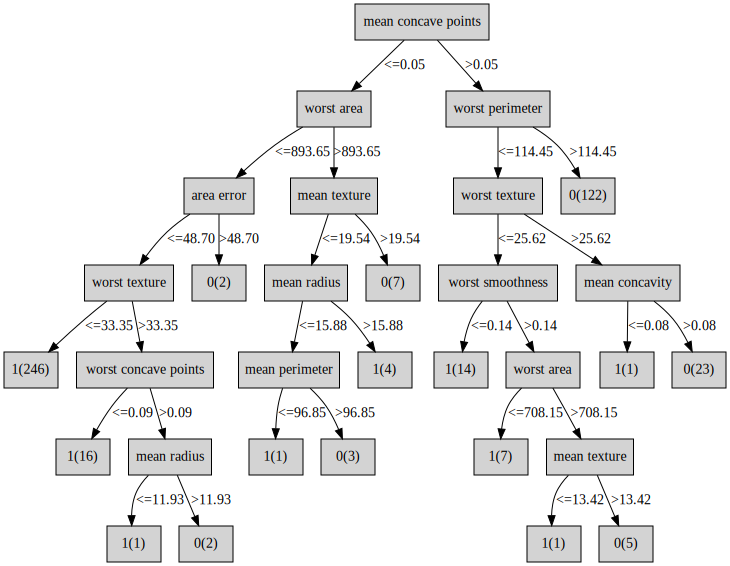

In [102]:
import graphviz
from id3 import export_graphviz

# Preprocessing of training data, fit model 
modelID3.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_treeID3 = export_graphviz(modelID3.tree_, 'graph.dot', 
                  feature_names=[d for d in data.feature_names], 
                  )
with open("graph.dot") as f:
    dot_graphID3 = f.read()
graphID3 = graphviz.Source(dot_graphID3)

# Preprocessing of validation data, get predictions
predsID3 = modelID3.predict(X_valid_full)

graphID3

### Accuracy and F1 Score

In [103]:
from sklearn.metrics import accuracy_score, f1_score

accuracyID3 = accuracy_score(y_valid, predsID3)
f1ID3 = f1_score(y_valid, predsID3)
score_dataID3 = {'accuracy': accuracyID3, 'f1': f1ID3}
scoreID3 = pd.DataFrame(data = score_dataID3, index=['score'])
scoreID3

,accuracy,f1
score,0.95614,0.96124



## KMeans
Berikut ini merupakan implementasi algoritma KMeans menggunakan library scikit-learn.

### Setup Library dan Dataset

In [104]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2, random_state=0)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


## Create model

In [105]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

### Fitting and predict

In [106]:
kmeans.fit(X_train_full, y_train)

predsKmeans = kmeans.predict(X_valid_full)

### Accuracy and F1 Score

In [107]:
from sklearn.metrics import accuracy_score, f1_score

accuracyKmeans = accuracy_score(y_valid, predsKmeans)
f1Kmeans = f1_score(y_valid, predsKmeans)
score_dataKmeans = {'accuracy': accuracyKmeans, 'f1': f1}
scoreKmeans = pd.DataFrame(data = score_dataKmeans, index=['score'])
scoreKmeans

,accuracy,f1
score,0.184211,0.933333


## Logistic Regression
Berikut ini merupakan implementasi algoritma Logistic Regression menggunakan library scikit-learn.

### Setup Library dan Dataset

In [108]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2, random_state=0)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


### Create model

In [109]:
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(random_state=0)

### Fitting and predict

In [110]:
modelLogistic.fit(X_train_full, y_train)

predsLogistic = modelLogistic.predict(X_valid_full)

C:\Python 36-64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Accuracy and F1 Score

In [111]:
from sklearn.metrics import accuracy_score, f1_score

accuracyLogistic = accuracy_score(y_valid, predsLogistic)
f1Logistic = f1_score(y_valid, predsLogistic)
score_dataLogistic = {'accuracy': accuracyLogistic, 'f1': f1Logistic}
scoreLogistic = pd.DataFrame(data = score_dataLogistic, index=['score'])
scoreLogistic

,accuracy,f1
score,0.947368,0.954545


## Neural Network
Berikut ini merupakan implementasi algoritma Neural Network menggunakan library scikit-learn.

### Setup Library dan Dataset

In [112]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
210,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.240,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865
367,12.210,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,0.05916,...,14.290,24.04,93.85,624.6,0.13680,0.21700,0.24130,0.08829,0.3218,0.07470
91,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,16.430,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
358,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,...,9.981,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431


### Create model

In [113]:
from sklearn.neural_network import MLPClassifier

modelNeural = MLPClassifier(random_state=1, max_iter=300)

### Fitting and predict

In [114]:
modelNeural.fit(X_train_full, y_train)
predsNeural = modelNeural.predict(X_valid_full)

### Accuracy and F1 Score

In [115]:
from sklearn.metrics import accuracy_score, f1_score

accuracyNeural = accuracy_score(y_valid, predsNeural)
f1Neural = f1_score(y_valid, predsNeural)
score_dataNeural = {'accuracy': accuracyNeural, 'f1': f1Neural}
scoreNeural = pd.DataFrame(data = score_dataNeural, index=['score'])
scoreNeural

,accuracy,f1
score,0.982456,0.985714


## SVM
Berikut ini merupakan implementasi algoritma SVM (Support Vector Machine) menggunakan library scikit-learn.

### Setup Library dan Dataset

In [116]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
117,14.87,16.67,98.64,682.5,0.11620,0.16490,0.169000,0.089230,0.2157,0.06768,...,18.81,27.37,127.10,1095.0,0.1878,0.44800,0.470400,0.20270,0.3585,0.10650
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.057780,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.17880,0.256000,0.12210,0.2889,0.08006
162,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.250800,0.128600,0.2027,0.06082,...,26.73,26.39,174.90,2232.0,0.1438,0.38460,0.681000,0.22470,0.3643,0.09223
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.240300,0.07370,0.2556,0.09359


### Create model

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

modelSVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))

### Fitting and predict

In [118]:
modelSVM.fit(X_train_full, y_train)
predsSVM = modelSVM.predict(X_valid_full)

### Accuracy and F1 Score

In [119]:
from sklearn.metrics import accuracy_score, f1_score

accuracySVM = accuracy_score(y_valid, predsSVM)
f1SVM = f1_score(y_valid, predsSVM)
score_dataSVM = {'accuracy': accuracySVM, 'f1': f1SVM}
scoreSVM = pd.DataFrame(data = score_dataSVM, index=['score'])
scoreSVM

,accuracy,f1
score,0.982456,0.984615


#D